The compnay wants to launch/update some features aimed at enhancing user engagement and improving financial literacy. 

These features aim to provide users with personalized financial recommendations and educational content as they navigate through the app.

One of the updated features was the points game(a kind of interactive IRA educated game), users could get points from playing the game, the points could be as the money in the App services.

To evaluate the impact of the new game on user engagement and retention within the financial services application. 
The focus lies in determining whether the launching of the updated game significantly improves user retention compared to the original old game 

In 2022, the application had 60 million register users, WAU (weekly active users) reached to 4 million.

In [3]:
!pip3 install pandas
!pip3 install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# import datasets, 
df=pd.read_csv("D:\\Studying\\AB Testing\\Data source\\points_game.csv")

In [6]:
df.info()
# get an overview of the dataset, check the null 
# version: old (old game); new (new updated game)
# sum_rounds: the game played rounds during the 1st week 
# retention_7: is that the user go back on the 7 days to played the game, 1 for yes, 0 for no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userid        90189 non-null  int64 
 1   version       90189 non-null  object
 2   sum_rounds    90189 non-null  int64 
 3   retention_7   90189 non-null  int64 
 4   retention_30  90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


the data is good, non-null data

In [7]:
df['userid'].value_counts().sort_values(ascending=False).head()

userid
116      1
76598    1
377      1
483      1
488      1
Name: count, dtype: int64

Also no duplicate data

# Checking data base info (especially for the new version data)

In [8]:
df.groupby('version').count() ## count the number of users in each group

,userid,sum_rounds,retention_7,retention_30
version,,,,
new,44700,44700,44700,44700
old,45489,45489,45489,45489


users were randomly assigned to eith old or new version;

<Axes: >

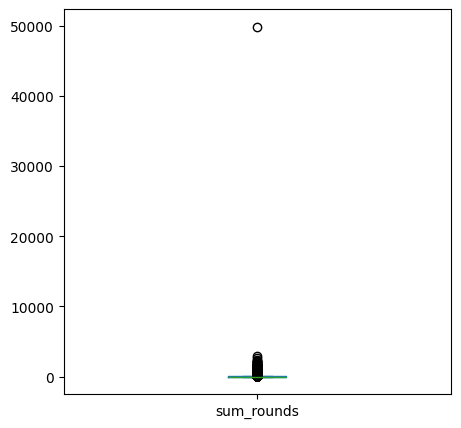

In [9]:
# for the old version:
df['sum_rounds'].plot.box(figsize=(5,5))

There is an oulier, the user played the points game 5000 rounds in a week. 
Due to the outlier, the boxplot is extremely skewed and not infomative. Check the percentile

In [10]:
df['sum_rounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_rounds, dtype: float64

50% users played the game fewer than 16 rounds weekly,
75% users played fewer than 51 rounds a week
From the percentile info, couldn't found out wheater the launch of the new game would helpful with users engagement and retention.

In [11]:
plot_df = df.groupby('sum_rounds')['userid'].count()
#counting the number of users for each number of game rounds
plot_df

sum_rounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

3994 new version users did not play the new points game once, either the old or the new one
Possible reasons: 
1. the points game not attract them;
2. our app services/products not attract them, the accumulated points  of the app not attractive;
3. they didn't like the game design/inteface etc.;
4. have not start to play or take a look for the new game.

More than 9000 users played the game fewer than 3 times a week, the possible reasons: 
1. did not like the pointed game; 
2. the game turned out to be different from what they expected; 

Text(0.5, 0, 'Number of rounds')

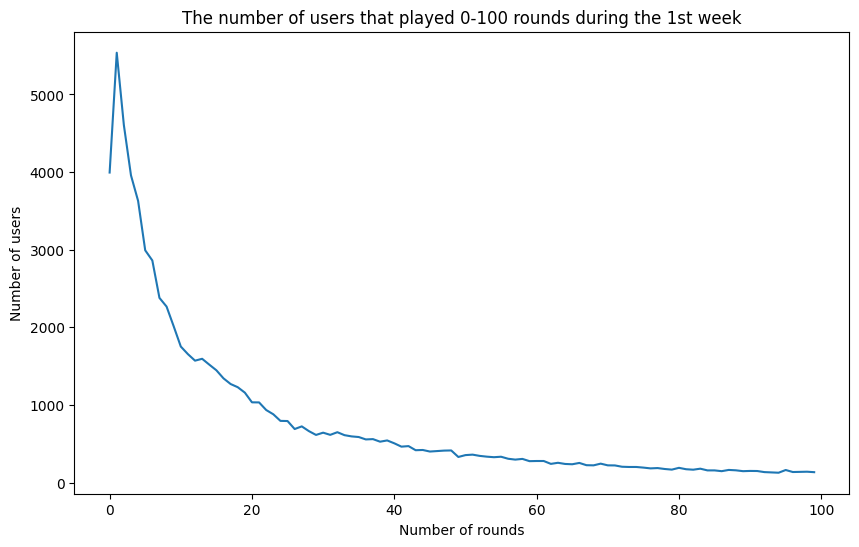

In [12]:
# plot the distribution of new version users that played 0-100 times during first week
%matplotlib inline

ax=plot_df[:100].plot(figsize = (10,6))
ax.set_title("The number of users that played 0-100 rounds during the 1st week")
ax.set_ylabel("Number of users")
ax.set_xlabel("Number of rounds")

The distribution is highly skewed with right tail.
Lots of users played few than 20 rounds in one week, as a points game, it's good.

# Comparing 7-days retention!!
The higher retention rate, the easier to retain users stay and use the application.

In [13]:
# calculate 7-day retention rate for each group 
df.groupby('version')['retention_7'].mean()

version
new    0.448188
old    0.442283
Name: retention_7, dtype: float64

The new game 7-day retention rate is slightly higher than the old game, 0.6%.

This application has reached 60 million users, WAU has 4 million, extra 0.6% increased within weekly retension would be a good signal into some services purchasement.
millions of users and that extra 0.6% could translate into some paying customers and/or ad dollars.

We can use Bootstrapping to test our confidence. Re-sample and replace data to and test our statistical confidence in our results.

version           new       old
retention_7  0.453913  0.439977
retention_7  0.446819  0.446201
retention_7  0.446580  0.443186
retention_7  0.448197  0.442367
retention_7  0.451069  0.440965
...               ...       ...
retention_7  0.447936  0.442617
retention_7  0.444295  0.441400
retention_7  0.447249  0.444692
retention_7  0.449897  0.442159
retention_7  0.451729  0.440163

[1000 rows x 2 columns]


<Axes: ylabel='Density'>

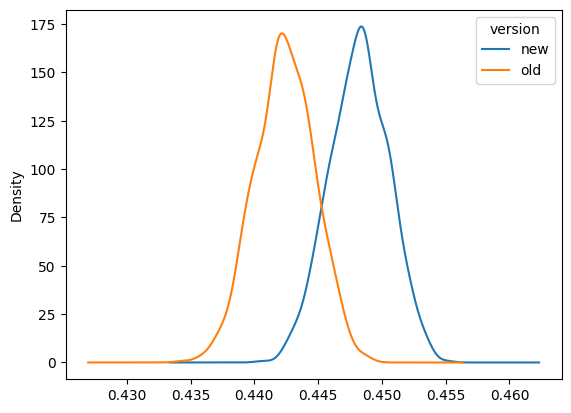

In [16]:
## Bootsrapping Means - sampling - 7 days retension 

# creat a list with bootstrapped means for each AB group
boot_7d = []
for i in range(1000):
    boot_mean = df.sample(frac=1, replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

# transform the list to dataframe
boot_7d = pd.DataFrame(boot_7d)
print(boot_7d)

boot_7d.plot.kde()

Text(0.5, 1.0, '% Diffenence in 7-days rentention between the old & new versions')

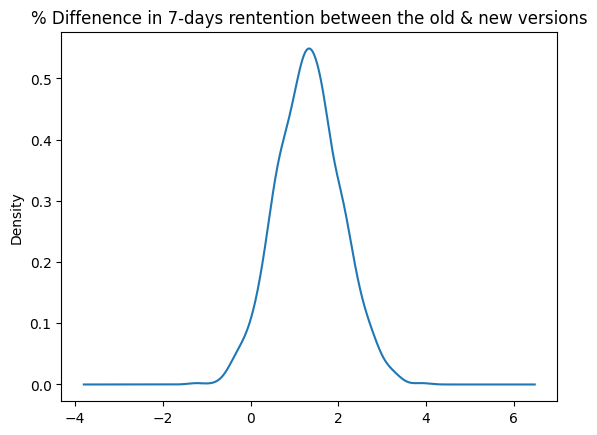

In [18]:
## plot the percent difference to have a closer look
# 1. adding a column with the % diff
boot_7d['Difference'] = (boot_7d['new'] - boot_7d['old'])/boot_7d['old']*100
# 2. plot 
ax = boot_7d['Difference'].plot(kind='density')
ax.set_title('% Diffenence in 7-days rentention between the old & new versions')

In [19]:
# 3.calculating the probability of 7-days retention
Prob = (boot_7d['Difference']>0).sum()/len(boot_7d['Difference'])*100
print("Probability of the new version 7-days retention is greater: ", (str(Prob)+"%"))

Probability of the new version 7-days retention is greater:  96.6%


# Comparing monthly retention!!

In [17]:
df.groupby('version')['retention_30'].mean()

version
new    0.190201
old    0.182000
Name: retention_30, dtype: float64

The new game 30-day retention rate is also slightly higher than the old game;
Similar with 7-days retention, let's do the bootstrapping~

<Axes: ylabel='Density'>

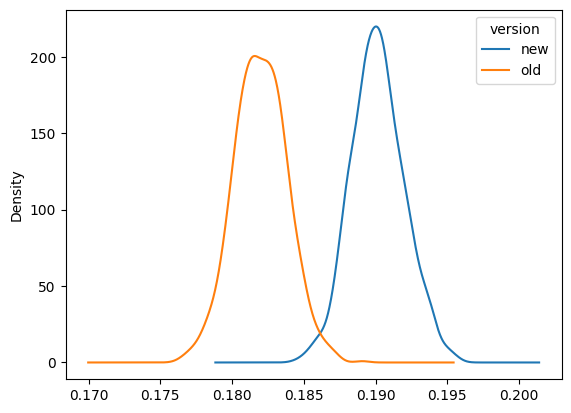

In [21]:
## Bootsrapping Means - sampling - monthly retension 
# creat a list with bootstrapped means(30-days) for each AB group
boot_30d = []
for i in range(1000):
    boot_mean = df.sample(frac=1, replace = True).groupby('version')['retention_30'].mean()
    boot_30d.append(boot_mean)

# transform the list to dataframe
boot_30d = pd.DataFrame(boot_30d)

boot_30d.plot.kde()

Probability of the new version 30-days retention is greater:  100.0%


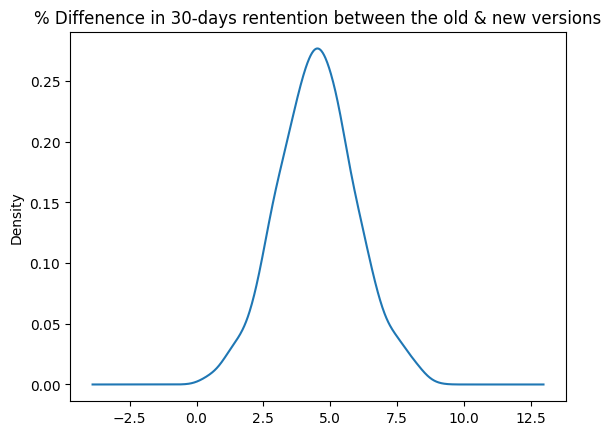

In [23]:
## plot the percent difference (30-days) to have a closer look
# 1. adding a column with the % diff
boot_30d['difference'] = (boot_30d['new']-boot_30d['old'])/boot_30d['old']*100

# 2. plot 
ax = boot_30d['difference'].plot(kind='density')
ax.set_title('% Diffenence in 30-days rentention between the old & new versions')

# 3. calculating the probability of 30-days retention
prob = (boot_30d['difference']>0).sum()/len(boot_30d['difference'])*100
print("Probability of the new version 30-days retention is greater: ", (str(prob)+"%"))

Both weekly and montly retention rate got a increase with launched the new points game. It is significant to launch the new game to get a higher retention, and plus some marketing activities to attract users following our financial products or services to lead the purchasement, would be helpful in our revenue.